In [21]:
# load data.csv into pandas

import pandas as pd

data = pd.read_csv('data.csv', delimiter=';')
# convert target to numeric
# Dropout -> 0, Enrolled -> 1, Graduate -> 2
data['Target'] = data['Target'].map({'Dropout': 0, 'Enrolled': 1, 'Graduate': 1})

X = data.drop('Target', axis=1)
y = data['Target']

print(X.head())
print(y.shape)

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [22]:
# using K-NN to predict the target

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

print("accuracy", accuracy_score(y_test, y_pred))

# accuracy, precision, recall, f1-score

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


accuracy 0.7378531073446327
              precision    recall  f1-score   support

           0       0.74      0.41      0.53       316
           1       0.74      0.92      0.82       569

    accuracy                           0.74       885
   macro avg       0.74      0.66      0.67       885
weighted avg       0.74      0.74      0.71       885



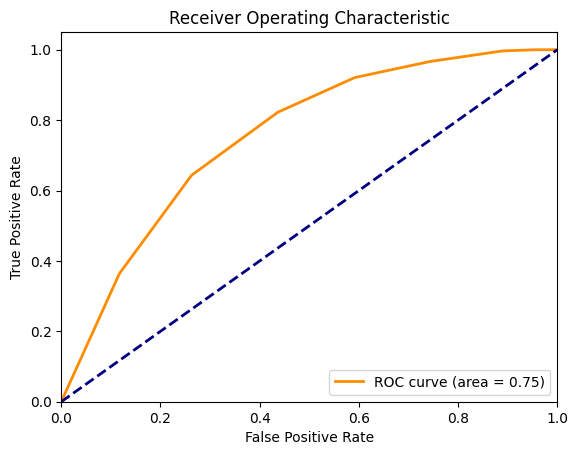

In [23]:
# draw roc curve and calculate auc

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [24]:
# hyperparameter search to find the best parameter k for K-NN

from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': range(1, 20)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X, y)

print("best parameter", grid_search.best_params_)
print("best score", grid_search.best_score_)
print("best estimator", grid_search.best_estimator_)





best parameter {'n_neighbors': 7}
best score 0.7551972288263415
best estimator KNeighborsClassifier(n_neighbors=7)


[np.float64(0.7305567911649666), np.float64(0.690777666999003), np.float64(0.7459288800265869), np.float64(0.7425370043715009), np.float64(0.7540680522534959), np.float64(0.7504522330444563), np.float64(0.7551972288263415), np.float64(0.7547442288519057), np.float64(0.750451466114477), np.float64(0.7547478078584758), np.float64(0.7472876243065675), np.float64(0.7486453460132424), np.float64(0.7425403277347444), np.float64(0.7495472556688908), np.float64(0.743444026893678), np.float64(0.7459306695298719), np.float64(0.742314083390853), np.float64(0.7468346243321318), np.float64(0.7405051512130275)]


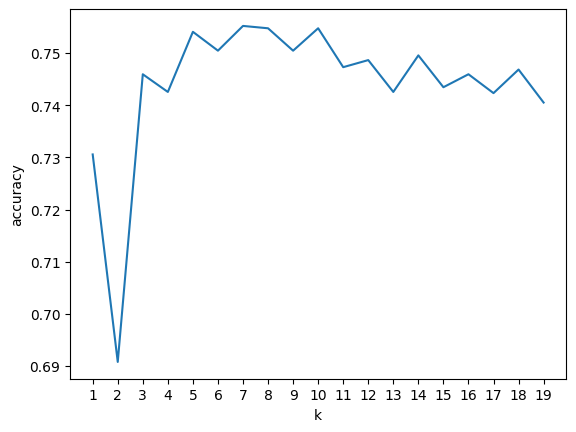

In [25]:
# use iteration to grid search the best parameter k

import numpy as np
from sklearn.model_selection import cross_val_score

scores = []
for k in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors=k)
    score = np.mean(cross_val_score(knn, X, y, cv=5))
    scores.append(score)

print(scores)

plt.plot(range(1, 20), scores)
plt.xticks(range(1, 20))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()
